In [1]:
import matplotlib.pyplot as plt
import numpy
import matplotlib
import matplotlib.colors as colors
#from partials import zintegral_fast, restrate_Ia, sigOM0sqinv
from matplotlib import ticker, cm
from astropy.cosmology import FlatLambdaCDM
import scipy.integrate as integrate
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import sys
#sys.path.insert(1, '/Users/akim/project/PeculiarVelocity/doc/src/')

from partials import zintegral_fast, restrate_Ia, sigOM0sqinv

In [2]:
#Number of SNe out to redshift
def N_SN_yr(zmax):
    OmegaM0 = 0.28
    cosmo = FlatLambdaCDM(H0=100, Om0=OmegaM0)
    ans = integrate.quad(lambda x: cosmo.differential_comoving_volume(x).value/(1+x), 0, zmax)
    return(ans[0]*restrate_Ia*4*numpy.pi)

In [3]:
# Manips
import pandas as pd
df = pd.DataFrame(index='ZTF Altsched Baseline TAIPAN'.split(),columns = 'emu N zmax date'.split())
df.loc['ZTF-II','emu'] = 0.12
df.loc['ZTF-II','zmax'] = 0.09
df.loc['ZTF-II', 'N'] = 6000
df.loc['ZTF-II','date'] = 2023

df.loc['ZTF-IIb','emu'] = 0.12
df.loc['ZTF-IIb','zmax'] = 0.08
df.loc['ZTF-IIb', 'N'] = 3000
df.loc['ZTF-IIb','date'] = 2023

df.loc['LSST','emu'] = 0.12
df.loc['LSST','zmax'] = 0.08
df.loc['LSST', 'N'] = 3000
df.loc['LSST','date'] = 2031

df.loc['ZTF-I','emu'] = 0.12
df.loc['ZTF-I','zmax'] = 0.08
df.loc['ZTF-I', 'N'] = 800
df.loc['ZTF-I','date'] = 2020

df.loc['SNGrowth (Traditional)','emu']=0.12
df.loc['SNGrowth (Traditional)','zmax']=0.08
df.loc['SNGrowth (Traditional)','N'] = 4000
df.loc['SNGrowth (Traditional)','date'] = 2023

df.loc['SNGrowth (PV optimized)','emu']=0.08
df.loc['SNGrowth (PV optimized)','zmax']=0.08
df.loc['SNGrowth (PV optimized)','N'] = 4000
df.loc['SNGrowth (PV optimized)','date'] = 2023


df.loc['Altsched', 'emu'] = 0.12
df.loc['Altsched', 'N'] = 125000
df.loc['Altsched', 'zmax'] = 0.25
df.loc['Altsched','date'] = 2032
df.loc['Baseline','N'] = 20000
df.loc['Baseline','emu'] = 0.12
df.loc['Baseline','zmax'] = 0.2
df.loc['Baseline','date'] = 2032
df.loc['TAIPAN','emu'] = 0.45
df.loc['TAIPAN','zmax'] = 0.1
df.loc['TAIPAN', 'N'] = 50000
df.loc['TAIPAN','date'] = 2022

In [4]:
def show_marker(name, **kwargs):
   x = numpy.log10(df.loc[name,'N'])
   y = df.loc[name,'emu']
   p = ax.plot(x,y, **{**dict(ls="None", marker="o"),**kwargs})
   return x,y

In [6]:
#ZTF2
skyfrac=0.5
zmax=0.09
skyarea = skyfrac*4*numpy.pi

#durations = numpy.arange(1,12.1,5)
logdurations = numpy.arange(0.4,1.61,1.2/10)
durations = 10**(logdurations)
sigm_Ias = numpy.arange(0.05,0.501,0.45/10)
X, Y = numpy.meshgrid(numpy.log10(durations*skyarea/4/numpy.pi*N_SN_yr(zmax)), sigm_Ias)

In [ ]:
var =[]
for sigm_Ia in sigm_Ias:
    v_=[]

    for duration in durations:
        f00,f11,f10, f02,f12,f22,lw0,lwa,bw0,bwa,Ow0,Owa,w0w0,w0wa,wawa = zintegral_fast(zmax,None,duration,sigm_Ia,restrate_Ia)
        v_.append(numpy.linalg.inv(numpy.array([[f00,f10,f02],[f10,f11,f12],[f02,f12,f22+sigOM0sqinv]]))[0,0])

    var.append(numpy.array(v_)*2*3.14/skyfrac)

In [ ]:
# Sample variance limit
f00,f11,f10, f02,f12,f22,lw0,lwa,bw0,bwa,Ow0,Owa,w0w0,w0wa,wawa = zintegral_fast(0.1,None,10,0.12,restrate_Ia)
limit = numpy.linalg.inv(numpy.array([[f00,f10,f02],[f10,f11,f12],[f02,f12,f22+sigOM0sqinv]]))[0,0]
limit = limit*2*3.14/skyfrac
print(numpy.sqrt(limit))

In [ ]:
#LSST North and South
#skyfrac_lsst = 0.5
#zmax_lsst=0.2
#duration_lsst=10

#sigm_Ia_lsst=0.08
#f00,f11,f10, f02,f12,f22 = zintegral_fast(zmax_lsst,None,duration_lsst,sigm_Ia_lsst,restrate_Ia)
#LSST_08 = numpy.linalg.inv(numpy.array([[f00,f10,f02],[f10,f11,f12],[f02,f12,f22+sigOM0sqinv]]))[0,0]

#sigm_Ia_lsst=0.12
#f00,f11,f10, f02,f12,f22 = zintegral_fast(zmax_lsst,None,duration_lsst,sigm_Ia_lsst,restrate_Ia)
#LSST_12 = numpy.linalg.inv(numpy.array([[f00,f10,f02],[f10,f11,f12],[f02,f12,f22+sigOM0sqinv]]))[0,0]

#LSST_08 = LSST_08*2*3.14/skyfrac_lsst
#LSST_12 = LSST_12*2*3.14/skyfrac_lsst

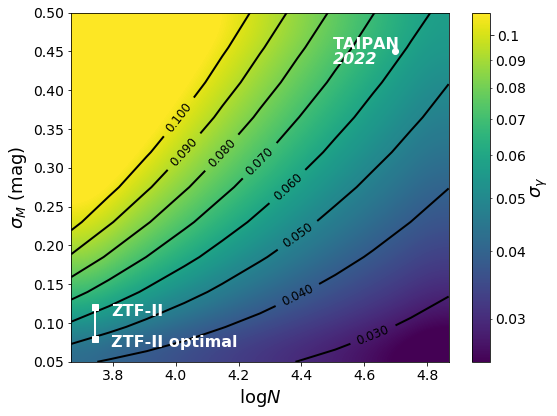

In [10]:
#plots
plt.rcParams["figure.figsize"] = (8,6)
Z = numpy.sqrt(var)
levels = numpy.arange(0.0,.1001,0.01)
fig, ax = plt.subplots()
cs = ax.imshow(Z,norm=colors.LogNorm(),origin='lower',interpolation='bicubic',aspect='auto',
               extent=[X.min(),X.max(), Y.min(), Y.max()],vmin=0.025,vmax=0.11)#, cmap=cm.PuBu_r)

cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r'$\sigma_\gamma$', fontsize=18)
cbar.ax.yaxis.set_major_formatter(ScalarFormatter())
cbar.ax.yaxis.set_minor_formatter(ScalarFormatter())
cbar.ax.tick_params(labelsize=14,which='both')

cset2 = ax.contour( Z, levels, colors='k',extent=[X.min(), X.max(), Y.min(), Y.max()])
ax.clabel(cset2, inline=True, fontsize=12)

ax.set_xlabel(r'$\log{N}$', fontsize=18)
ax.set_ylabel(r'$\sigma_M$ (mag)', fontsize=18)
ax.tick_params(labelsize=14)

# ZTF-II
name = "ZTF-II"
color = "w"
# x,y = show_marker(name, color=color, marker="s")
logN = numpy.log10(3*skyarea/4/numpy.pi*N_SN_yr(zmax)) # 3-years 

ax.plot([logN,logN],[0.08,0.12],color=color)
p = ax.plot(logN,0.08, **{**dict(ls="None", marker="s",color=color)})
p = ax.plot(logN,0.12, **{**dict(ls="None", marker="s",color=color)})
ax.text(logN+.05,0.12-.015,name, fontdict=dict(color = color ,weight = 'bold'), va="bottom", ha="left", fontsize=16)
ax.text(logN+.05,0.08-.015,name+" optimal", fontdict=dict(color = color ,weight = 'bold'), va="bottom", ha="left", fontsize=16)
#ax.text(logN+.1,0.1,df.loc[name,'date'], fontdict=dict(color = color ,weight = 'bold'), 
#           va="top", ha="left", style='italic', fontsize="small")

name = "TAIPAN"
color = "w"
x,y = show_marker(name, color=color)
ax.text(x-.2,y,name, fontdict=dict(color = color ,weight = 'bold'), va="bottom", ha="left", fontsize=16)
ax.text(x-.2,y,df.loc[name,'date'], fontdict=dict(color = color ,weight = 'bold'), 
           va="top", ha="left", style='italic', fontsize=16)

# cset2 = ax.contour( Z, [numpy.sqrt(LSST_08),numpy.sqrt(LSST_12)], colors='red',extent=[X.min(), X.max(), Y.min(), Y.max()])
# ax.text(4.5,0.12, 'LSST optimal', fontdict=dict(color = color ,weight = 'bold'), va="bottom", ha="left")
# ax.text(4.4+.3,0.25, 'LSST ', fontdict=dict(color = color ,weight = 'bold'), va="bottom", ha="left")


#name = 'LSST + North'
#print (numpy.sqrt(LSST_08),numpy.sqrt(LSST_12))
#cset2 = ax.contour( Z, [numpy.sqrt(LSST_08),numpy.sqrt(LSST_12)], colors='red',extent=[X.min(), X.max(), Y.min(), Y.max()])
#ax.text(4.5,0.15, name, fontdict=dict(color = color ,weight = 'bold'), va="bottom", ha="left")

#cset2 = ax.contour( Z, [limit], colors='red',extent=[X.min(), X.max(), Y.min(), Y.max()])

#print (numpy.sqrt(limit))
plt.tight_layout()
plt.savefig("surface1.pdf")

In [9]:
import pickle
pkl_file = open('surface.pkl', 'wb')
pickle.dump(var,pkl_file)
pkl_file.close()

In [16]:
import pickle
pkl_file = open('surface.pkl', 'rb')
var  = pickle.load(pkl_file)
pkl_file.close()
#var=out[0]
#LSST_08=out[1]
#LSST_12=out[2]

In [11]:
#LSST
skyfrac=0.5
duration = 10

zmaxs = numpy.arange(0.05,0.30001,0.25/10)
logzmaxs = numpy.arange(numpy.log10(0.05), numpy.log10(0.3)+0.001, numpy.log10(.3/0.05)/10)
zmaxs  = 10**logzmaxs
sigm_Ias = numpy.arange(0.05,0.151,0.1/10)
X, Y = numpy.meshgrid(zmaxs, sigm_Ias)

In [12]:
var =[]
for sigm_Ia in sigm_Ias:
    v_=[]

    for zmax in zmaxs:
        f00,f11,f10, f02,f12,f22 = zintegral_fast(zmax,None,duration,sigm_Ia,restrate_Ia)
        v_.append(numpy.linalg.inv(numpy.array([[f00,f10,f02],[f10,f11,f12],[f02,f12,f22+sigOM0sqinv]]))[0,0])

    var.append(numpy.array(v_)*2*3.14/skyfrac)

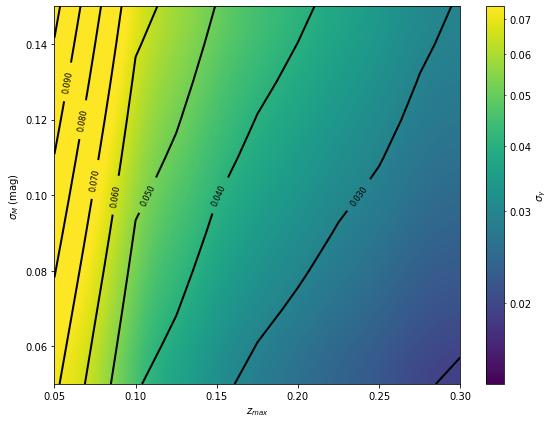

In [13]:
#plots
plt.rcParams["figure.figsize"] = (8,6)
Z = numpy.sqrt(var)
levels = numpy.arange(0.0,.1001,0.01)
fig, ax = plt.subplots()
cs = ax.imshow(Z,norm=colors.LogNorm(),origin='lower',interpolation='bicubic',aspect='auto',
               extent=[X.min(),X.max(), Y.min(), Y.max()],vmin=0.014,vmax=0.074)#, cmap=cm.PuBu_r)
#cs = ax.imshow(Z,origin='lower',interpolation='bicubic',aspect='auto',
#               extent=[X.min(),X.max(), Y.min(), Y.max()])#, cmap=cm.PuBu_r)
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r'$\sigma_\gamma$')
cbar.ax.yaxis.set_major_formatter(ScalarFormatter())
cbar.ax.yaxis.set_minor_formatter(ScalarFormatter())

cset2 = ax.contour( Z, levels, colors='k',extent=[X.min(), X.max(), Y.min(), Y.max()])
ax.clabel(cset2, inline=True, fontsize=8)

ax.set_xlabel(r'$z_{max}$')
ax.set_ylabel(r'$\sigma_M$ (mag)')

plt.tight_layout()
plt.savefig("surface2.pdf")

In [13]:
import pickle
pkl_file = open('surface2.pkl', 'wb')
pickle.dump(var,pkl_file)
pkl_file.close()

In [14]:
# ZTF and Taipan
skyfrac=0.5
zmax=0.09
skyarea = skyfrac*4*numpy.pi

f00,f11,f10, f02,f12,f22 = zintegral_fast(zmax,None,3,0.08,restrate_Ia)
dum=numpy.linalg.inv(numpy.array([[f00,f10,f02],[f10,f11,f12],[f02,f12,f22+sigOM0sqinv]]))[0,0]
print(numpy.sqrt(dum*2*3.14/skyfrac))

f00,f11,f10, f02,f12,f22 = zintegral_fast(zmax,None,3,0.12,restrate_Ia)
dum=numpy.linalg.inv(numpy.array([[f00,f10,f02],[f10,f11,f12],[f02,f12,f22+sigOM0sqinv]]))[0,0]
print(numpy.sqrt(dum*2*3.14/skyfrac))

0.04781964081070142
0.060052747332377754


In [53]:
# AP March 2020
# GW 3G 

#Turn mpi on to run in parallel
mpi = False 
if mpi: 
    from joblib import Parallel, delayed
    njobs = 40

skyfrac=1. 
# Perhaps skyfrac should be ~0.8 because we may not be able to see counterparts behind the plane
zmax=0.2
skyarea = skyfrac*4*numpy.pi
restrate_BNS = 2810/1e9 # Mpc^-3 yr^-1  Optimistic, lower bound 250 after 190425

In [ ]:
def N_yr(zmax,restrate):
    OmegaM0 = 0.28
    cosmo = FlatLambdaCDM(H0=100, Om0=OmegaM0)
    ans = integrate.quad(lambda x: cosmo.differential_comoving_volume(x).value/(1+x), 0, zmax)
    return(ans[0]*restrate*4*numpy.pi)

logdurations = numpy.arange(0.4,1.4,1.2/8)
durations = 10**(logdurations)
# Different uncertainties between 1-20% Remember this is ~2*sigma_d because it's sigma_mag
sigm_GWs = [0.01,0.02,0.05,0.1, 0.15, 0.2, 0.3, 0.4] #at z=0.1  #numpy.arange(0.02,0.501,0.45/10)

X, Y = numpy.meshgrid(numpy.log10(durations*skyarea/4/numpy.pi*N_yr(zmax,restrate_BNS)), sigm_GWs)


In [ ]:
var =[]

def fisher(zmax,duration,sigm,restrate,sigOM0sqinv)
    f00,f11,f10, f02,f12,f22,lw0,lwa,bw0,bwa,Ow0,Owa,w0w0,w0wa,wawa = zintegral_fast(zmax,None,duration,sigm,restrate,GW=True)
    return numpy.linalg.inv(numpy.array([[f00,f10,f02],[f10,f11,f12],[f02,f12,f22+sigOM0sqinv]]))[0,0])

for sigm_GW in sigm_GWs:
    if mpi:
        v_ = Parallel(n_jobs=njobs)(delayed(fisher)(zmax,duration,sigm_GW,restrate,sigOM0sqinv) for duration in durations)
    else:
        v_ = []
        #for duration in durations:
        f00,f11,f10, f02,f12,f22,lw0,lwa,bw0,bwa,Ow0,Owa,w0w0,w0wa,wawa = zintegral_fast(zmax,None,duration,sigm_GW,restrate_BNS)
        v_.append(numpy.linalg.inv(numpy.array([[f00,f10,f02],[f10,f11,f12],[f02,f12,f22+sigOM0sqinv]]))[0,0])

    var.append(numpy.array(v_)*2*3.14/skyfrac)
    
np.savetxt('fisher_out.csv',var,delimiter=",")

In [2]:
import matplotlib.pyplot as plt
import numpy
import matplotlib
import matplotlib.colors as colors
#from partials import zintegral_fast, restrate_Ia, sigOM0sqinv
from matplotlib import ticker, cm
from astropy.cosmology import FlatLambdaCDM
import scipy.integrate as integrate
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import sys
#sys.path.insert(1, '/Users/akim/project/PeculiarVelocity/doc/src/')

from partials import zintegral_fast, restrate_Ia, sigOM0sqinv

In [3]:
#GW-SN comparison

#Now at z=0.05 for comparison with SN:
sigm_GWs = [0.002,0.005,0.02,0.01,0.1]

duration= 10 

skyfrac_GW=1. 
skyfrac_SN=0.5

logzmaxs = numpy.arange(numpy.log10(0.05), numpy.log10(0.3)+0.001, numpy.log10(.3/0.05)/10)
zmaxs  = 10**logzmaxs
skyarea_GW = skyfrac_GW*4*numpy.pi

restrate_BNS = 2810/1e9 #assuming same for SN for the exercise
X, Y = numpy.meshgrid(zmaxs, sigm_GWs)

varGW, varSN = [], []
for sigm_GW in sigm_GWs:
    vGW_, vSN_ = [], []
    for zmax in zmaxs:
        #GWs
        print("Computing GW fisher matrix for sigma ",sigm_GW,", z ",zmax)
        f00,f11,f10, f02,f12,f22,lw0,lwa,bw0,bwa,Ow0,Owa,w0w0,w0wa,wawa = zintegral_fast(zmax,None,duration,sigm_GW,restrate_BNS,GW=True)
        vGW_.append(numpy.linalg.inv(numpy.array([[f00,f10,f02],[f10,f11,f12],[f02,f12,f22+sigOM0sqinv]]))[0,0])
        #SNe
        print("Same for SNe")
        sigm_SN = sigm_GW*5./numpy.log(10)
        f00,f11,f10, f02,f12,f22,lw0,lwa,bw0,bwa,Ow0,Owa,w0w0,w0wa,wawa = zintegral_fast(zmax,None,duration,sigm_SN,restrate_BNS,GW=False)
        vSN_.append(numpy.linalg.inv(numpy.array([[f00,f10,f02],[f10,f11,f12],[f02,f12,f22+sigOM0sqinv]]))[0,0])

    varGW.append(numpy.array(vGW_)*2*3.14/skyfrac_GW)
    varSN.append(numpy.array(vSN_)*2*3.14/skyfrac_SN)
    
numpy.savetxt('../out/fisher_out_GW_10yr.csv',varGW,delimiter=",")
numpy.savetxt('../out/fisher_out_SN_10yr.csv',varSN,delimiter=",")

Computing GW fisher matrix for sigma  0.002 , z  0.049999999999999996
Same for SNe
Computing GW fisher matrix for sigma  0.002 , z  0.059811559942565755
Same for SNe
Computing GW fisher matrix for sigma  0.002 , z  0.07154845405526275
Same for SNe
Computing GW fisher matrix for sigma  0.002 , z  0.08558849297048521
Same for SNe
Computing GW fisher matrix for sigma  0.002 , z  0.10238362555396088
Same for SNe
Computing GW fisher matrix for sigma  0.002 , z  0.12247448713915879
Same for SNe
Computing GW fisher matrix for sigma  0.002 , z  0.14650780257917592
Same for SNe
Computing GW fisher matrix for sigma  0.002 , z  0.17525720432035943
Same for SNe
Computing GW fisher matrix for sigma  0.002 , z  0.2096481356314735
Same for SNe
Computing GW fisher matrix for sigma  0.002 , z  0.25078764062338066
Same for SNe
Computing GW fisher matrix for sigma  0.002 , z  0.2999999999999995
Same for SNe
Computing GW fisher matrix for sigma  0.005 , z  0.049999999999999996
Same for SNe
Computing GW fi

In [3]:
def plt_style():
    plt.rcParams.update({
                        'lines.linewidth':1.0,
                        'lines.linestyle':'-',
                        'lines.color':'black',
                        'font.family':'serif',
                        'font.weight':'normal',
                        'font.size':13.0,
                        'text.color':'black',
                        'text.usetex':True,
                        'axes.edgecolor':'black',
                        'axes.linewidth':1.0,
                        'axes.grid':False,
                        'axes.titlesize':'x-large',
                        'axes.labelsize':'x-large',
                        'axes.labelweight':'normal',
                        'axes.labelcolor':'black',
                        'axes.formatter.limits':[-4,4],
                        'xtick.major.size':7,
                        'xtick.minor.size':4,
                        'xtick.major.pad':8,
                        'xtick.minor.pad':8,
                        'xtick.labelsize':'medium',
                        'xtick.minor.width':1.0,
                        'xtick.major.width':1.0,
                        'ytick.major.size':7,
                        'ytick.minor.size':4,
                        'ytick.major.pad':8,
                        'ytick.minor.pad':8,
                        'ytick.labelsize':'medium',
                        'ytick.minor.width':1.0,
                        'ytick.major.width':1.0,
                        'legend.numpoints':1,
                        #'legend.fontsize':'x-large',
                        'legend.shadow':False,
                        'legend.frameon':False})


# These are the "Tableau 20" colors as RGB.
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)




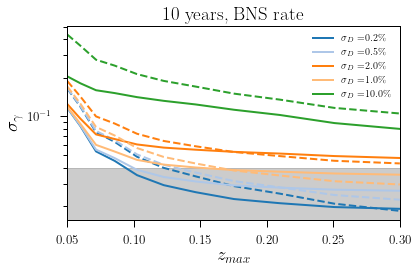

In [7]:
plt_style()

for i in range(5):
    plt.plot(X[0],numpy.sqrt(varGW[i]), c=tableau20[i],lw=2,label='$\sigma_D=$'+str(sigm_GWs[i]*100)+'\%')
    plt.plot(X[0],numpy.sqrt(varSN[i]),'--', c=tableau20[i],lw=2)
    
plt.fill_between([0.05,0.3],[0.04,0.04],alpha=0.2,color='k')

plt.yscale('log')
plt.legend(fontsize=10)
plt.ylabel('$\sigma_\gamma$')
plt.xlim(0.05,0.3)
plt.title('10 years, BNS rate')
plt.xlabel('$z_{max}$')
plt.tight_layout()
plt.savefig('../out/sigmagamma_zmax_GW_SN_'+str(duration)+'yr_BNS.png',dpi=150)

In [4]:
#When you want to read in the output file
import numpy as np

var=np.genfromtxt('../out/fisher_duration_newsigmad_out_moreduration.csv',delimiter=',')
var_z=np.genfromtxt('../out/fisher_zmax_newsigmad_out.csv',delimiter=',')

def N_yr(zmax,restrate):
    OmegaM0 = 0.28
    cosmo = FlatLambdaCDM(H0=100, Om0=OmegaM0)
    ans = integrate.quad(lambda x: cosmo.differential_comoving_volume(x).value/(1+x), 0, zmax)
    return(ans[0]*restrate*4*numpy.pi)

logdurations = numpy.arange(-0.4,1.4,1.2/8)
durations = 10**(logdurations)
# Different uncertainties between 1-20% Remember this is ~2*sigma_d because it's sigma_mag
sigm_GWs = [0.005,0.01,0.02,0.05,0.1, 0.15, 0.2, 0.3] #at z=0.1  #numpy.arange(0.02,0.501,0.45/10)

skyfrac_GW=1. 
skyarea = skyfrac_GW*4*numpy.pi
zmax=0.3
restrate_BNS = 2810/1e9 #assuming same for SN for the exercise
#X, Y = numpy.meshgrid(zmaxs, sigm_GWs)
X, Y = numpy.meshgrid(numpy.log10(durations*skyarea/4/numpy.pi*N_yr(zmax,restrate_BNS)), sigm_GWs)



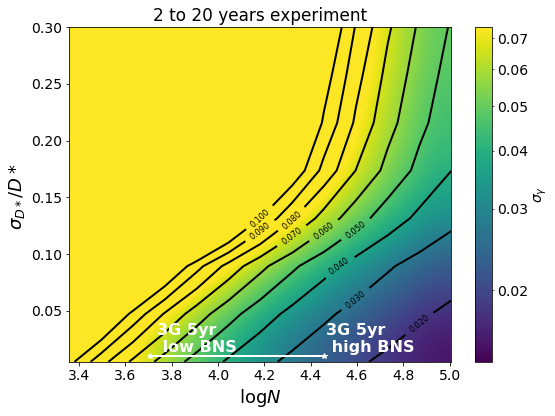

In [5]:
#plot logN surface

#factor for conversion between distance and mag uncertainties
sig_factor = 5./numpy.log(10)
Y_dist = Y #/sig_factor

plt.rcParams["figure.figsize"] = (8,6)
Z = numpy.sqrt(var)
levels = numpy.arange(0.0,.1001,0.01)
fig, ax = plt.subplots()
cs = ax.imshow(Z,norm=colors.LogNorm(),origin='lower',interpolation='bicubic',aspect='auto',
               extent=[X.min(),X.max(), Y_dist.min(), Y_dist.max()],vmin=0.014,vmax=0.074)#, cmap=cm.PuBu_r)
#cs = ax.imshow(Z,origin='lower',interpolation='bicubic',aspect='auto',
#               extent=[X.min(),X.max(), Y.min(), Y.max()])#, cmap=cm.PuBu_r)
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r'$\sigma_\gamma$')
cbar.ax.yaxis.set_major_formatter(ScalarFormatter())
cbar.ax.yaxis.set_minor_formatter(ScalarFormatter())

cset2 = ax.contour( Z, levels, colors='k',extent=[X.min(), X.max(),Y_dist.min(), Y_dist.max()])
ax.clabel(cset2, inline=True, fontsize=8)


# 3G
name = "3G 5yr \n high BNS"
color = "w"
# x,y = show_marker(name, color=color, marker="s")
skyfrac_3G=1.
zmax_3G=0.3
skyarea_3G = skyfrac_3G*4*numpy.pi
logN = numpy.log10(5*skyarea_3G/4/numpy.pi*N_yr(zmax_3G, restrate_BNS)) # 5-years 
p = ax.plot(logN,0.01, **{**dict(ls="None", marker="*",color=color)})
ax.text(logN+.01,0.01+.001, name, fontdict=dict(color = color ,weight = 'bold'), va="bottom", ha="left", fontsize=16)


name = "3G 5yr \n low BNS"
restrate_BNS_lo = 250/1e9 
#color='grey'
logN_lo = numpy.log10(10*skyarea_3G/4/numpy.pi*N_yr(zmax_3G, restrate_BNS_lo)) # 5-years 
p = ax.plot(logN_lo,0.01, **{**dict(ls="None", marker="*",color=color)})
ax.text(logN_lo+.03,0.01+.001, name, fontdict=dict(color = color ,weight = 'bold'), va="bottom", ha="left", fontsize=16)

ax.plot([logN_lo,logN],[0.01,0.01],color=color)

#plt.xlim(4.1,5.1)

ax.set_xlabel(r'$\log{N}$', fontsize=18)
ax.set_ylabel(r'$\sigma_{D*}/D*$ ', fontsize=18)
ax.tick_params(labelsize=14)
plt.title('2 to 20 years experiment')

plt.tight_layout()
plt.savefig("../out/surface2_GW_newsigmaD.pdf")




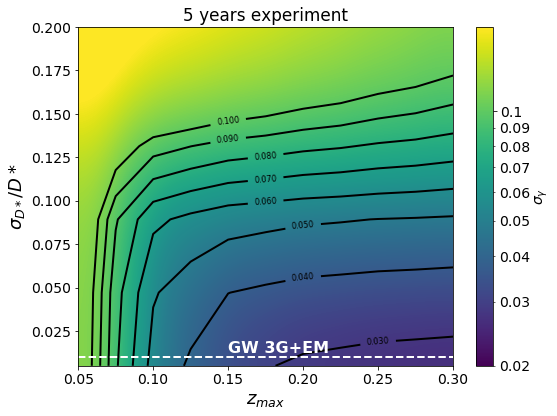

In [6]:
#plot zmax surface

#factor for conversion between distance and mag uncertainties
sig_factor = 5./numpy.log(10)

zmaxs = numpy.arange(0.05,0.30001,0.25/10)
X_z, Y_z = numpy.meshgrid(zmaxs, sigm_GWs)
Y_z_dist = Y_z #/sig_factor

plt.rcParams["figure.figsize"] = (8,6)
Z = numpy.sqrt(var_z)
levels = numpy.arange(0.0,.1001,0.01)
fig, ax = plt.subplots()
cs = ax.imshow(Z,norm=colors.LogNorm(),origin='lower',interpolation='bicubic',aspect='auto',
               extent=[X_z.min(),X_z.max(), Y_z_dist.min(), Y_z_dist.max()],vmin=0.02,vmax=0.17)#, cmap=cm.PuBu_r)
#cs = ax.imshow(Z,origin='lower',interpolation='bicubic',aspect='auto',
#               extent=[X.min(),X.max(), Y.min(), Y.max()])#, cmap=cm.PuBu_r)
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r'$\sigma_\gamma$')
cbar.ax.yaxis.set_major_formatter(ScalarFormatter())
cbar.ax.yaxis.set_minor_formatter(ScalarFormatter())

cset2 = ax.contour( Z, levels, colors='k',extent=[X_z.min(), X_z.max(),Y_z_dist.min(), Y_z_dist.max()])
ax.clabel(cset2, inline=True, fontsize=8)



ax.set_xlabel(r'$z_{max}$', fontsize=18)
ax.set_ylabel(r'$\sigma_{D*}/D*$', fontsize=18)
ax.tick_params(labelsize=14)
plt.title('5 years experiment')


# 3G
name = "GW 3G+EM"
color = "w"
# x,y = show_marker(name, color=color, marker="s")

#skyfrac_3G=1.
#zmax_3G=0.2
#skyarea_3G = skyfrac_3G*4*numpy.pi
#logN = numpy.log10(5*skyarea_3G/4/numpy.pi*N_yr(zmax_3G, restrate_BNS)) # 5-years 
#p = ax.plot(zmax_3G,0.01, **{**dict(ls="None", marker="*",color=color)})
#ax.text(zmax_3G+.01,0.01+.001, name, fontdict=dict(color = color ,weight = 'bold'), va="bottom", ha="left", fontsize=16)


ax.plot([X_z.min(),X_z.max()],[0.01,0.01],'--',color=color)
ax.text(X_z.min()+.1,0.01+.001, name, fontdict=dict(color = color,weight = 'bold'), va="bottom", ha="left", fontsize=16)
#ax.text(X_z.min()+.01,0.14+.001, "GW170817", fontdict=dict(color = color), va="bottom", ha="left", fontsize=16)


plt.ylim(0.005,0.2)
plt.tight_layout()
plt.savefig("../out/surface_zmax_GW.pdf")